In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plot_confusion_matrix

%matplotlib inline

In [11]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.float_format', '{:,.3f}'.format)

In [12]:
sns.set_palette('Paired')

In [13]:
df = pd.read_csv('data/cleaned_dataset_2.csv', index_col='customerID')

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.850,False,1,0,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.950,False,0,1,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.850,True,0,1,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.300,False,0,1,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.700,True,1,0,0,1,0,1,0,0,0,0,1,0


In [14]:
#scaling numeric data columns
df['tenure'] = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,-1.277,0,0,0,1,0,0,0,0,1,-1.160,False,1,0,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,0,0,0.066,1,0,1,0,1,0,0,0,0,-0.260,False,0,1,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,0,0,-1.237,1,0,1,1,0,0,0,0,1,-0.363,True,0,1,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,0,0,0,0.514,0,0,1,0,1,1,0,0,0,-0.746,False,0,1,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,-1.237,1,0,0,0,0,0,0,0,1,0.197,True,1,0,0,1,0,1,0,0,0,0,1,0


In [15]:
#Export cleaned dataset
df.to_csv('data/cleaned_dataset_3.csv')

In [16]:
#split data into train and test partitions
#labels
y=df['Churn']

#Features
X= df.drop(columns=['Churn'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5634, 26) (5634,)
(1409, 26) (1409,)


In [18]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = model_lr.predict(X_test)

pd.Series(y_pred).value_counts()

False    1088
True      321
dtype: int64

In [20]:
score = model_lr.score(X_test, y_test)

score

0.8062455642299503

Normalized confusion matrix
[[0.88407163 0.11592837]
 [0.43103448 0.56896552]]


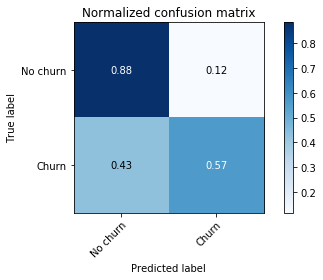

<Figure size 1296x576 with 0 Axes>

In [21]:
plot_confusion_matrix(y_test, 
                      y_pred, 
                      classes=['No churn', 'Churn'],
                      normalize=True,
                      title='Normalized confusion matrix')

In [22]:
#Support Vector Mahchines Model
from sklearn.svm import SVC
model_svm = SVC(gamma=0.3, probability=True)

model_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred = model_svm.predict(X_test)

pd.Series(y_pred).value_counts()

False    1081
True      328
dtype: int64

In [24]:
score = model_svm.score(X_test, y_test)
score

0.8112136266855926

Normalized confusion matrix
[[0.88407163 0.11592837]
 [0.41091954 0.58908046]]


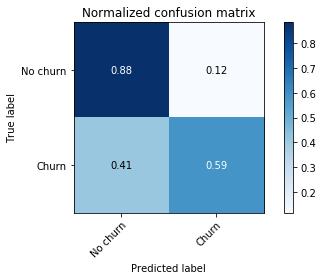

<Figure size 1296x576 with 0 Axes>

In [25]:
plot_confusion_matrix(y_test,
                     y_pred,
                     classes=['No churn', 'Churn'],
                     normalize=True,
                     title='Normalized confusion matrix')

In [26]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=600)

model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
y_pred = model_rf.predict(X_test)

pd.Series(y_pred).value_counts()

False    1080
True      329
dtype: int64

In [28]:
score = model_rf.score(X_test, y_test)

score

0.7934705464868701

Normalized confusion matrix
[[0.87181904 0.12818096]
 [0.4454023  0.5545977 ]]


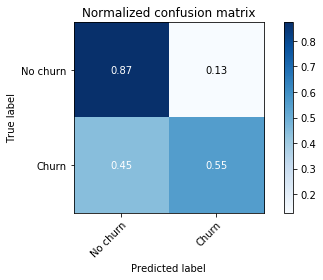

<Figure size 1296x576 with 0 Axes>

In [29]:
plot_confusion_matrix(y_test, 
                     y_pred,
                     classes = ['No churn', 'Churn'],
                     normalize=True,
                     title='Normalized confusion matrix')

In [30]:
#Multilayer perceptron model
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(max_iter=30)
model_mlp.fit(X_train, y_train)

/Users/Jinspire/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
y_pred = model_mlp.predict(X_test)

pd.Series(y_pred).value_counts()

False    1103
True      306
dtype: int64

In [32]:
score = model_mlp.score(X_test, y_test)

score

0.8140525195173882

Normalized confusion matrix
[[0.89632422 0.10367578]
 [0.43678161 0.56321839]]


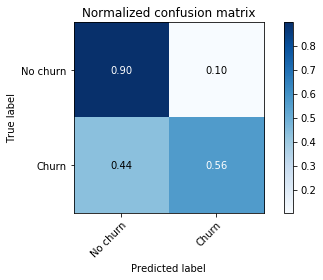

<Figure size 1296x576 with 0 Axes>

In [33]:
plot_confusion_matrix(y_test, 
                     y_pred,
                     classes = ['No churn', 'Churn'],
                     normalize=True,
                     title='Normalized confusion matrix')

In [34]:
#Showing ROC curves
from sklearn.metrics import roc_curve, roc_auc_score

def show_ROC(model):
    probs = model.predict_proba(X_test)
    
    #keep probabilities for the positive only
    probs = probs[:,1]
    
    #calculate AUC
    auc = roc_auc_score(y_test, probs)
    
    # calculate ROC curve
    # TPR (True Positive Rate) / Recall / Sensitivity
    # FPR (False Positive Rate)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    
    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='_nolegend_')
    plt.plot(fpr, tpr, marker='.', ms=0.1, label='{} - {}'.format(auc.round(3), type(model).__name__))

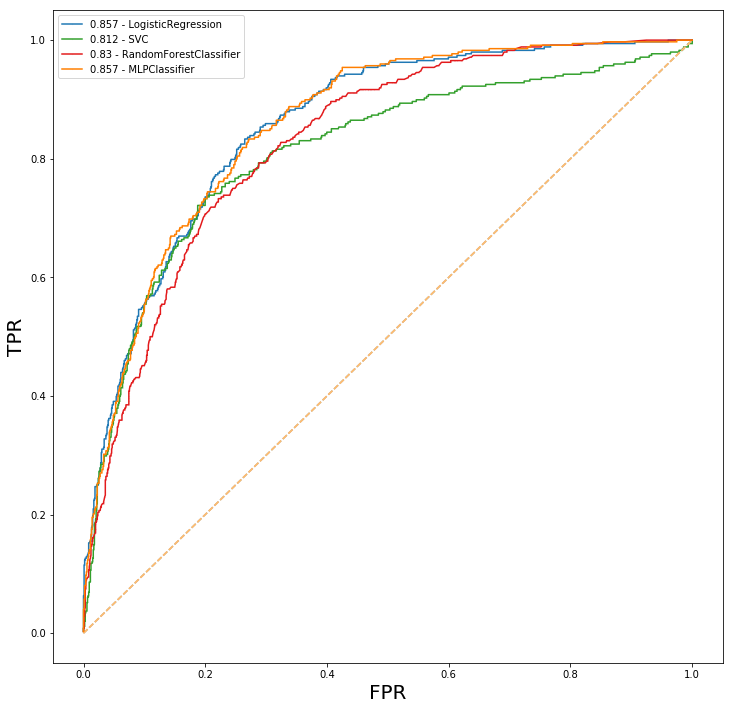

In [39]:
plt.figure(figsize=(12,12))

show_ROC(model_lr)
show_ROC(model_svm)
show_ROC(model_rf)
show_ROC(model_mlp)

plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)

plt.legend()

In [43]:
#Use MLPClassifier to see how changing the threshold will affect the amount of Type I and II errors
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(max_iter=30)

model_mlp.fit(X_train, y_train)

model_mlp.score(X_test, y_test)

/Users/Jinspire/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8069552874378992

In [44]:
y_pred = model_mlp.predict(X_test)

pd.Series(y_pred).value_counts()

False    1111
True      298
dtype: int64

In [46]:
probs_y = model_mlp.predict_proba(X_test)
probs_y

array([[0.91323405, 0.08676595],
       [0.9027393 , 0.0972607 ],
       [0.69522228, 0.30477772],
       ...,
       [0.98524025, 0.01475975],
       [0.79643038, 0.20356962],
       [0.33692403, 0.66307597]])

In [47]:
thresholds = np.round(np.arange(0,1,.1)+.1,2)

In [55]:
df = pd.DataFrame({'True Value' : y_test.values}, index=probs_y[:,1], columns=[str(t) for t in thresholds] + ['True Value'])

In [56]:
n = df.shape[0]

In [57]:
for threshold in thresholds:
    df[str(threshold)] = df.index >= threshold

In [58]:
df.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,True Value
0.087,False,False,False,False,False,False,False,False,False,False,False
0.097,False,False,False,False,False,False,False,False,False,False,False
0.305,True,True,True,False,False,False,False,False,False,False,False
0.453,True,True,True,True,False,False,False,False,False,False,True
0.177,True,False,False,False,False,False,False,False,False,False,False


In [59]:
(df['0.4'] == df['True Value']).sum() / n

0.8034066713981547

In [60]:
(df['0.5'] == df['True Value']).sum() / n

0.8069552874378992

In [61]:
(df['0.6'] == df['True Value']).sum() / n

0.8112136266855926

Normalized confusion matrix
[[0.89538172 0.10461828]
 [0.46264368 0.53735632]]


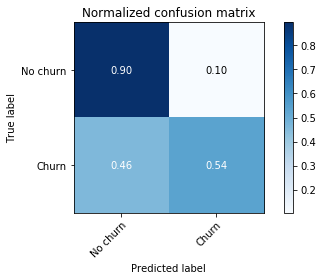

<Figure size 1296x576 with 0 Axes>

In [62]:
#Confusion Matrix
plot_confusion_matrix(y_test, y_pred, classes = ['No churn', 'Churn'], normalize=True, title='Normalized confusion matrix')

In [63]:
#Finding FPs and FNs:
true_neg_values = df.loc[df['True Value'] == False]
true_pos_values = df.loc[df['True Value'] == True]

In [64]:
true_neg_values.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,True Value
0.087,False,False,False,False,False,False,False,False,False,False,False
0.097,False,False,False,False,False,False,False,False,False,False,False
0.305,True,True,True,False,False,False,False,False,False,False,False
0.177,True,False,False,False,False,False,False,False,False,False,False
0.103,True,False,False,False,False,False,False,False,False,False,False


In [65]:
#score
(df['0.5'] == df['True Value']).sum() / n

0.8069552874378992

In [67]:
#False Positives
true_neg_values.loc[true_neg_values['0.5'] == True].shape[0] / true_neg_values.shape[0]

0.10461828463713478

In [68]:
#False Negatives
true_pos_values.loc[true_pos_values['0.5'] == True].shape[0] / true_pos_values.shape[0]

0.5373563218390804

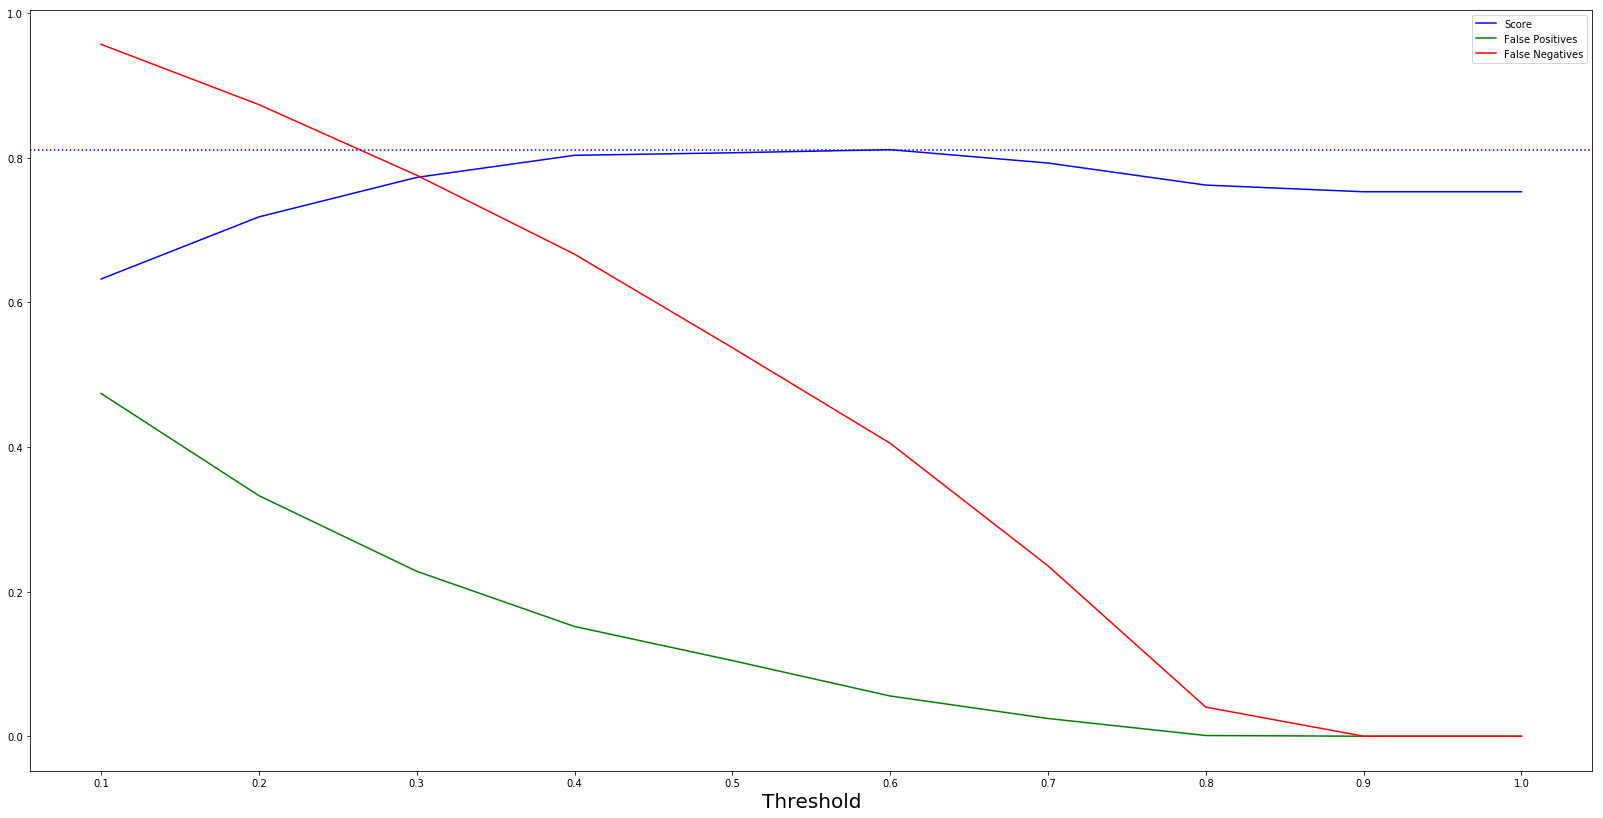

In [71]:
# Comparing multiple thresholds for FPs and FNs
plt.figure(figsize=(28,14))
threshold_labels = [str(t) for t in thresholds]

scores = [
    (df[th] ==  df['True Value']).sum() / n
    for th in threshold_labels
]

false_pos = [
    true_neg_values.loc[true_neg_values[th] == True].shape[0] / true_neg_values.shape[0]
    for th in threshold_labels
]

false_neg = [
    true_pos_values.loc[true_pos_values[th] == True].shape[0] / true_pos_values.shape[0]
    for th in threshold_labels
]

plt.plot(threshold_labels, scores, 'b', label='Score')
plt.plot(threshold_labels, false_pos, 'g', label='False Positives')
plt.plot(threshold_labels, false_neg, 'r', label='False Negatives')
plt.axhline(max(scores), color='b', linestyle=':')
plt.xlabel('Threshold', fontsize=20)

plt.legend()

plt.savefig('score.png')